<a href="https://colab.research.google.com/github/bijay2051/data/blob/main/MapOfNepal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import json

# Fetch GeoJSON data
url = "https://raw.githubusercontent.com/bijay2051/data/refs/heads/main/districts.json"
response = requests.get(url)
data = response.json()  # Parse the response as JSON

# Save the data into a local file if necessary (optional, for reusability)
geojson_file_path = 'districts.geojson'
with open(geojson_file_path, 'w') as f:
    json.dump(data, f)




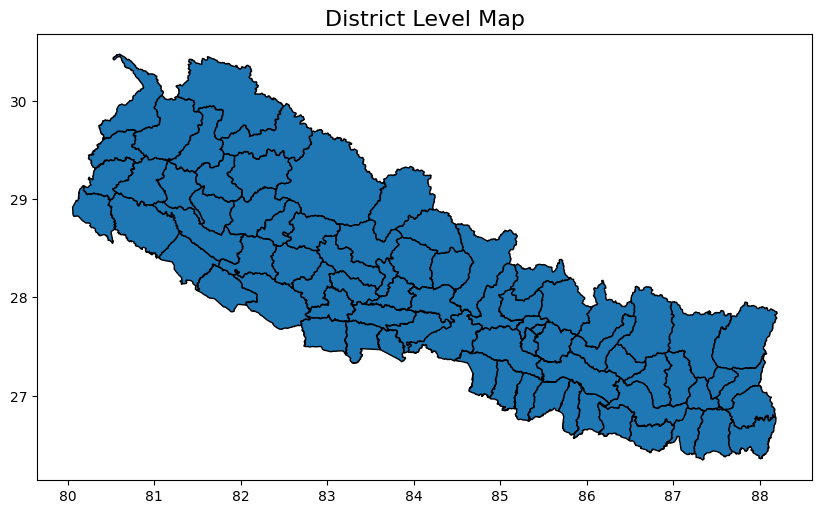

In [ ]:
# Read the GeoJSON file using GeoPandas
districts = gpd.read_file(geojson_file_path)

# Plot the data
districts.plot(figsize=(10, 10), edgecolor='black')

# Add a title to the plot
plt.title("District Level Map", fontsize=16)

# Display the plot
plt.show()

In [ ]:
#fill out necessarry information of about player and plot type here

player_id = 6420 #undestat player id
is_season = True #if is_season = True, then specify season
season = 2020 #2020 corresponds to 2020/21
highlight_goals = False

In [ ]:
#import libraries

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
from mplsoccer.pitch import Pitch, VerticalPitch
import requests

In [ ]:
#data scraping

base = "https://understat.com/player/"
player_id = str(player_id)
base_url = base + player_id
url = base_url
res = requests.get(url)
soup = BeautifulSoup(res.content,"lxml")

scripts = soup.find_all('script')
strings = scripts[3].string

ind_start = strings.index("('")+2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

data = json.loads(json_data)

finaldata = pd.DataFrame.from_dict(data)

In [ ]:
# Data Wrangling

finaldata["X"] = pd.to_numeric(finaldata["X"])
finaldata["Y"] = pd.to_numeric(finaldata["Y"])
finaldata["season"] = pd.to_numeric(finaldata["season"])
finaldata["minute"] = pd.to_numeric(finaldata["minute"])
finaldata["xG"] = pd.to_numeric(finaldata["xG"])

finaldata["X"] = finaldata["X"] * 120
finaldata["Y"] = finaldata["Y"] * 80

finaldata = finaldata[finaldata["situation"] != "Penalty"]
finaldata = finaldata[["result", "X", "Y", "xG", "player", "season"]]

if is_season == True:
        finaldata = finaldata[finaldata["season"] == season]
        year = {2014: "2014/15", 2015: "2015/16", 2016: "2016/17", 2017: "2017/18", 2018: "2018/19",
                2019: "2019/20", 2020: "2020/21", 2021: "2021/22"}
        finaldata["season"] = finaldata["season"].map(year)
        szn = finaldata["season"].values[0]
        x = 45.2
        y = 62
elif is_season == False:
        finaldata["all"] = finaldata["season"]
        finaldata["all"] = "All Seasons"
        szn = finaldata["all"].values[0]
        x = 47
        y = 62

In [ ]:
#import libraries

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
!pip install mplsoccer
from mplsoccer.pitch import Pitch, VerticalPitch
import requests

#plotting

if highlight_goals == False:
        colours = {'Goal':'#229954', 'SavedShot':'#CB4335', 'MissedShots':'#F1C40F',
                   'BlockedShot':'#3498DB', 'ShotOnPost':'#76448A'}
        player_name = finaldata["player"].values[0]
        res = {"Goal": 1, "SavedShot": 0, "BlockedShot": 0, "ShotOnPost": 0,
               "MissedShots": 0, "OwnGoal": 0}
        finaldata["isGoal"] = finaldata["result"].map(res)
        finaldata["col"] = finaldata["result"].map(colours)
        finaldata = finaldata.dropna()

        xG = sum(finaldata["xG"])
        xG = str(round(xG, 2))
        xgst = sum(finaldata["xG"]) / len(finaldata.index)
        xgst = str(round(xgst, 2))
        gls = sum(finaldata["isGoal"])

        g = mpatches.Patch(color = "#229954", label = "Goal")
        ss = mpatches.Patch(color = "#CB4335", label = "Saved Shot")
        ms = mpatches.Patch(color = "#F1C40F", label = "Missed Shot")
        bs = mpatches.Patch(color = "#3498DB", label = "Blocked Shot")
        sop = mpatches.Patch(color = "#76448A", label = "Shot on Post")

        pitch = VerticalPitch(pitch_color='#1B2631', line_color = "#707B7C", stripe=False, half = True
                              # remove constrained_layout = True
                              )
        fig, ax = pitch.draw()
        plt.scatter(x = finaldata["Y"], y = finaldata["X"], s = finaldata["xG"] * 600, c = finaldata["col"],
                    edgecolors="white")
        plt.gca().invert_xaxis()
        plt.text(x, y, f"{szn}", color="white", size= 18, fontweight = "bold")
        plt.text(17.5, 61, f"Total xG = {xG}\nxG/Shot = {xgst}\nGoals = {gls}", size = 16, color = "white")
        plt.text(79, 56.5, "Created by @placeholder2004\nData from Understat", color = "white", size = 12)
        plt.title(f"{player_name}", color = "white", fontweight = "bold", size = 25, pad = -25)
        leg = plt.legend(handles = [g, ss, ms, bs, sop], frameon = False, loc = "center left",
                         bbox_to_anchor=(0.043,0.15), prop={'size': 12})

        for text in leg.get_texts():
            text.set_color("white")

elif highlight_goals == True:
        gls = {'Goal':"Goal", 'SavedShot': "NoGoal", 'MissedShots': "NoGoal",
               'BlockedShot': "NoGoal", 'ShotOnPost': "NoGoal"}
        colours = {'Goal':"#E74C3C", 'NoGoal': "#1B2631"}
        finaldata["result"] = finaldata["result"].map(gls)
        player_name = finaldata["player"].values[0]
        res = {"Goal": 1, "NoGoal": 0}
        finaldata["isGoal"] = finaldata["result"].map(res)
        finaldata["col"] = finaldata["result"].map(colours)
        finaldata = finaldata.

SyntaxError: invalid syntax (<ipython-input-14-20f47aeb91e9>, line 63)

In [ ]:
# %% Create plot of shot positions and associated xG for user-selected player, team or competition
#
# Inputs:   Player, team or competition to plot xG for
#
# Outputs:  Plot of shot positions and associated xG
#
# Notes: Uses logistic regression xG model.

# %% Imports

import bz2
import pickle
from PIL import Image
import requests
from io import BytesIO
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mplsoccer.pitch import VerticalPitch

# %% User inputs

# Select player, team or competition to plot shots for
player_team_or_comp = 'Mohamed Salah'

# Logo to add to plot figure
#logo = 'https://1000logos.net/wp-content/uploads/2019/01/German-Bundesliga-Logo-2002.png'
logo = "https://logos-world.net/wp-content/uploads/2020/06/Liverpool-Logo.png"

# %% Set constants

PITCH_WIDTH_Y = 80
PITCH_LENGTH_X = 120

# %% Load xG model and data

shots_model_df = bz2.BZ2File("../../data_directory/misc_data/log_regression_xg_data.pbz2", 'rb')
shots_model_df = pickle.load(shots_model_df)

# %% Isolate shots for selected player or team

if not shots_model_df[shots_model_df['competition_name']==player_team_or_comp].empty:
    selected_shots = shots_model_df[shots_model_df['competition_name']==player_team_or_comp]
    comp_selected = 1

elif not shots_model_df[shots_model_df['team_name']==player_team_or_comp].empty:
    selected_shots = shots_model_df[shots_model_df['team_name']==player_team_or_comp]
    comp_selected = 0

elif not shots_model_df[shots_model_df['player_name']==player_team_or_comp].empty:
    selected_shots = shots_model_df[shots_model_df['player_name']==player_team_or_comp]
    comp_selected = 0

else:
    selected_shots = pd.DataFrame()
    comp_selected = 0

# Individual dataframe for shots/headers/goals/no-goals etc.
selected_ground_shots = selected_shots[selected_shots['header_tag']==0]
selected_ground_goals = selected_ground_shots[selected_ground_shots['goal']==1]
selected_headers = selected_shots[selected_shots['header_tag']==1]
selected_headed_goals = selected_headers[selected_headers['goal']==1]

# Lowest xG goal
lowest_xg_goal = selected_shots[selected_shots['goal']==1].sort_values('xG').head(1)
highest_xg_miss = selected_shots[selected_shots['goal']==0].sort_values('xG', ascending=False).head(1)

# %% Plot shots

# Overwrite rcParams
mpl.rcParams['xtick.color'] = "white"
mpl.rcParams['ytick.color'] = "white"
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

# Plot pitch
pitch = VerticalPitch(half=True,pitch_color='#313332', line_color='white', linewidth=1, stripe=False)
fig, ax = pitch.grid(nrows=1, ncols=1, title_height = 0.03, grid_height=0.7, endnote_height=0.05, axis=False)
fig.set_size_inches(9, 7)
fig.set_facecolor('#313332')

# Plot ground shots
ax['pitch'].scatter(PITCH_WIDTH_Y/2 + selected_ground_shots['c_yards'], PITCH_LENGTH_X - selected_ground_shots['x_yards'],
                    marker='h', s=200, alpha=0.2, c=selected_ground_shots['xG'], edgecolors='w',vmin=-0.04,vmax=0.4,cmap=plt.cm.inferno, zorder=2)
p1 = ax['pitch'].scatter(PITCH_WIDTH_Y/2 + selected_ground_goals['c_yards'], PITCH_LENGTH_X - selected_ground_goals['x_yards'],
                    marker='h', s=200, c=selected_ground_goals['xG'], edgecolors='w', lw=2, vmin=-0.04,vmax=0.4,cmap=plt.cm.inferno, zorder=2)

# Plot headers
ax['pitch'].scatter(PITCH_WIDTH_Y/2 + selected_headers['c_yards'], PITCH_LENGTH_X - selected_headers['x_yards'],
                    marker='o', s=200, alpha=0.2, c=selected_headers['xG'], edgecolors='w',vmin=-0.04,vmax=0.4,cmap=plt.cm.inferno, zorder=2)
ax['pitch'].scatter(PITCH_WIDTH_Y/2 + selected_headed_goals['c_yards'], PITCH_LENGTH_X - selected_headed_goals['x_yards'],
                    marker='o', s=200, c=selected_headed_goals['xG'], edgecolors='w', lw=2, vmin=-0.04,vmax=0.4,cmap=plt.cm.inferno, zorder=2)

ax['pitch'].set_ylim([59.9,125])

# Plot highest xG miss and lowest xG goal chance
if lowest_xg_goal['header_tag'].values==1:
    lowxg_marker = 'o'
else:
    lowxg_marker = 'h'
if highest_xg_miss['header_tag'].values==1:
    highxg_marker = 'o'
else:
    highxg_marker = 'h'

ax['pitch'].scatter(PITCH_WIDTH_Y/2 + highest_xg_miss['c_yards'], PITCH_LENGTH_X - highest_xg_miss['x_yards'],
                    marker=highxg_marker, s=200, c='r', edgecolors='grey', lw = 2.5 ,vmin=-0.04,vmax=0.4,cmap=plt.cm.inferno, zorder=3)
ax['pitch'].scatter(PITCH_WIDTH_Y/2 + lowest_xg_goal['c_yards'], PITCH_LENGTH_X - lowest_xg_goal['x_yards'],
                    marker=lowxg_marker, s=200, c='g', edgecolors='w', lw = 2.5 ,vmin=-0.04,vmax=0.4,cmap=plt.cm.inferno, zorder=3)


# Add colorbar
cb_ax = fig.add_axes([0.53, 0.107, 0.35, 0.03])
cbar = fig.colorbar(p1, cax=cb_ax, orientation='horizontal')
cbar.outline.set_edgecolor('w')
cbar.set_label(" xG", loc = "left", color='w', fontweight='bold', labelpad=-28.5)

# Manual legend
legend_ax = fig.add_axes([0.075, 0.07, 0.5, 0.08])
legend_ax.axis("off")
plt.xlim([0,5])
plt.ylim([0,1])
legend_ax.scatter(0.2, 0.7, marker='h', s=200, c='#313332', edgecolors='w')
legend_ax.scatter(0.2, 0.2, marker='o', s=200, c='#313332', edgecolors='w')
legend_ax.text(0.35, 0.61, "Foot", color="w")
legend_ax.text(0.35, 0.11, "Header", color="w")
legend_ax.scatter(1.3, 0.7, marker='h', s=200, c='purple', edgecolors='w', lw=2)
legend_ax.scatter(1.3, 0.2, marker='h', alpha=0.2, s=200, c='purple', edgecolors='w')
legend_ax.text(1.45, 0.61, "Goal", color="w")
legend_ax.text(1.465, 0.11, "No Goal", color="w")
legend_ax.scatter(2.4, 0.7, marker='h', s=200, c='g', edgecolors='w', lw=2.5)
legend_ax.scatter(2.4, 0.2, marker='h', s=200, c='r', edgecolors='grey', lw=2.5)
legend_ax.text(2.55, 0.61, "Lowest xG Goal", color="w")
legend_ax.text(2.565, 0.11, "Highest xG Miss", color="w")

# Title text
subtitle_text = f"{selected_shots['competition_name'].unique()[0]}"
subsubtitle_text = "2017-2018"
if comp_selected == 1:
    title_text = "Expected Goals"
elif comp_selected == 0:
    title_text = f"{player_team_or_comp} Expected Goals"

fig.text(0.18,0.92, title_text, fontweight="bold", fontsize=16, color='w')
fig.text(0.18,0.883, subtitle_text, fontweight="regular", fontsize=14, color='w')
fig.text(0.18,0.852, subsubtitle_text, fontweight="regular", fontsize=10, color='w')


# Stats
if selected_shots['goal'].sum()-selected_shots.sum()['xG'] > 0:
    sign = '+'
else:
    sign=''

fig.text(0.65,0.925, "Shots:", fontweight="bold", fontsize=10, color='w')
fig.text(0.65,0.9, "xG:", fontweight="bold", fontsize=10, color='w')
fig.text(0.65,0.875, "Goals:", fontweight="bold", fontsize=10, color='w')
fig.text(0.65,0.85, "xG Perf:", fontweight="bold", fontsize=10, color='w')
fig.text(0.73,0.925, f"{int(selected_shots.count()[0])}", fontweight="regular", fontsize=10, color='w')
fig.text(0.73,0.9, f"{round(selected_shots.sum()['xG'],1)}", fontweight="regular", fontsize=10, color='w')
fig.text(0.73,0.875, f"{int(selected_shots['goal'].sum())}", fontweight="regular", fontsize=10, color='w')
fig.text(0.73,0.85, f"{sign}{int(round(100*(selected_shots['goal'].sum()-selected_shots.sum()['xG'])/selected_shots.sum()['xG'],0))}%", fontweight="regular", fontsize=10, color='w')

fig.text(0.79,0.927, "xG/shot:", fontweight="bold", fontsize=10, color='w')
fig.text(0.79,0.9, "Goal/shot:", fontweight="bold", fontsize=10, color='w')
fig.text(0.79,0.875, "L xG Goal:", fontweight="bold", fontsize=10, color='w')
fig.text(0.79,0.85, "H xG Miss:", fontweight="bold", fontsize=10, color='w')
fig.text(0.89,0.925, f"{round(selected_shots.sum()['xG']/selected_shots.count()[0],2)}", fontweight="regular", fontsize=10, color='w')
fig.text(0.89,0.9, f"{round(selected_shots['goal'].sum()/selected_shots.count()[0],2)}", fontweight="regular", fontsize=10, color='w')
fig.text(0.89,0.875, f"{round(lowest_xg_goal['xG'].values[0],2)}", fontweight="regular", fontsize=10, color='w')
fig.text(0.89,0.85, f"{round(highest_xg_miss['xG'].values[0],2)}", fontweight="regular", fontsize=10, color='w')


# Footer text
fig.text(0.5, 0.02, "Created by Jake Kolliari. Data provided by Wyscout.com",
         fontstyle="italic", ha="center", fontsize=9, color="white")

# Add WC Logo
ax = fig.add_axes([0.02,0.8,0.2,0.2])
ax.axis("off")
response = requests.get(logo)
img = Image.open(BytesIO(response.content))
ax.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: '../../data_directory/misc_data/log_regression_xg_data.pbz2'